# What drives the price of a car?

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Student: With the availble automobile data, create a model that demonstates the relationship between one or more predictor variables and the price of a vehicle, with minimal error.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Student: 1.) Determine size and completeness of the dataset. 2.) Determine what models best address the type of data present in the dataset. 3.) Determine the completness of the dataset and need for data augmentation.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [13]:
import pandas as pd
import seaborn as sns

In [14]:
df = pd.read_csv('C:/Users/pcdun/OneDrive/Documents/AIML/11/practical_application_II_starter/data/vehicles.csv')

In [15]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

<Axes: >

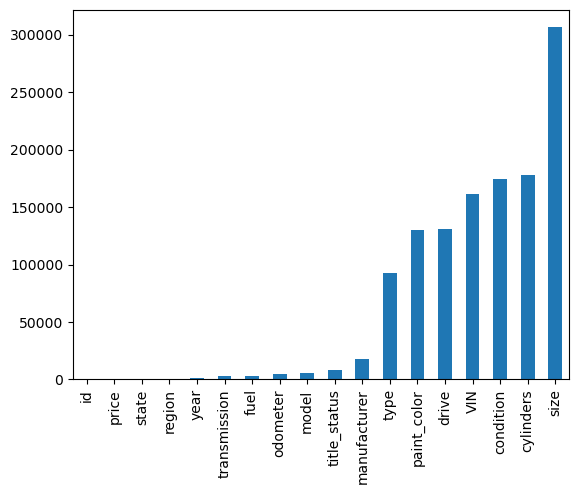

In [17]:
df.isnull().sum().sort_values().plot(kind = 'bar')

In [83]:
df_auto = df.dropna(subset = ['manufacturer','condition', 'cylinders'], how ='any',axis=0)

In [84]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174175 entries, 27 to 426878
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            174175 non-null  int64  
 1   region        174175 non-null  object 
 2   price         174175 non-null  int64  
 3   year          174175 non-null  float64
 4   manufacturer  174175 non-null  object 
 5   model         172380 non-null  object 
 6   condition     174175 non-null  object 
 7   cylinders     174175 non-null  object 
 8   fuel          174175 non-null  object 
 9   odometer      172965 non-null  float64
 10  title_status  168727 non-null  object 
 11  transmission  174158 non-null  object 
 12  VIN           93660 non-null   object 
 13  drive         146005 non-null  object 
 14  size          88828 non-null   object 
 15  type          154895 non-null  object 
 16  paint_color   144029 non-null  object 
 17  state         174175 non-null  object 
dtypes: 

In [85]:
df_auto.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [86]:
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [88]:
manf_encoded = pd.get_dummies(df_auto[['manufacturer']])

In [89]:
X = pd.get_dummies(df_auto[['manufacturer']])
y = df_auto['price']
manf_linreg = LinearRegression(fit_intercept=False).fit(X, y)

In [90]:
print(manf_linreg)
print(type(manf_linreg))
manf_linreg.coef_

LinearRegression(fit_intercept=False)
<class 'sklearn.linear_model._base.LinearRegression'>


array([ 19823.58336572,  20112.8       ,  67524.77777778,  22353.58718487,
        15430.89359525,  65466.74069427,  15701.36659514,  21626.64496836,
        10196.91869651,  13895.5       ,  15143.98341194, 112878.41025641,
         8180.30833333,  54589.56708305,  37310.85443669,  16410.16      ,
         9511.83845029,   9384.8433144 ,  20307.56571655,  18595.01408451,
        18079.37143539,   9951.58296118,  16881.66666667,  18694.74628479,
        18117.12104981,   8250.13282443,  18752.60776699,   5764.73124147,
         9845.52625   ,  11194.29480737,  36500.        ,  27793.55866051,
         8155.39069767,  29227.42068966,  27099.40946472,  22874.00682128,
         7908.81335616,  10461.91555556,  37578.16666667, 499325.47736412,
        10692.44756236,   9526.0621118 ])

In [101]:
ideal_manf_prediction = float(round(manf_linreg.coef_[0], 2))

In [102]:
print(ideal_manf_prediction)
print(type(ideal_manf_prediction))

19823.58
<class 'float'>


In [93]:
X = pd.get_dummies(df_auto[['manufacturer', 'cylinders', 'condition']])
y = df_auto['price']
totAuto_linreg = LinearRegression(fit_intercept=False).fit(X, y)
linreg_mse = mean_squared_error(totAuto_linreg.predict(X), y)

In [94]:
print(totAuto_linreg)
print(totAuto_linreg.coef_)
print(linreg_mse)

LinearRegression(fit_intercept=False)
[-2.30561827e+17 -2.30561827e+17 -2.30561827e+17 -2.30561827e+17
 -2.30561827e+17 -2.30561827e+17 -2.30561827e+17 -2.30561827e+17
 -2.30561827e+17 -2.30561827e+17 -2.30561827e+17 -2.30561827e+17
 -2.30561827e+17 -2.30561827e+17 -2.30561827e+17 -2.30561827e+17
 -2.30561827e+17 -2.30561827e+17 -2.30561827e+17 -2.30561827e+17
 -2.30561827e+17 -2.30561827e+17 -2.30561827e+17 -2.30561827e+17
 -2.30561827e+17 -2.30561827e+17 -2.30561827e+17 -2.30561827e+17
 -2.30561827e+17 -2.30561827e+17 -2.30561827e+17 -2.30561827e+17
 -2.30561827e+17 -2.30561827e+17 -2.30561827e+17 -2.30561827e+17
 -2.30561827e+17 -2.30561827e+17 -2.30561827e+17 -2.30561827e+17
 -2.30561827e+17 -2.30561827e+17 -2.95034128e+18 -2.95034128e+18
 -2.95034128e+18 -2.95034128e+18 -2.95034128e+18 -2.95034128e+18
 -2.95034128e+18 -2.95034128e+18  3.18090311e+18  3.18090311e+18
  3.18090311e+18  3.18090311e+18  3.18090311e+18  3.18090311e+18]
167688604010849.7


In [95]:
X = pd.get_dummies(df_auto[['manufacturer', 'cylinders', 'condition']])
y = df_auto['price']
huber_totAuto = HuberRegressor(fit_intercept=False).fit(X, y)
huber_mse = mean_squared_error(huber_totAuto.predict(X), y)

In [96]:
print(huber_totAuto)
print(huber_totAuto.coef_)
print(huber_mse)

HuberRegressor(fit_intercept=False)
[  2634.62108733   9693.36610656  16879.36753413   5466.20088152
  -2239.00346722  -4440.62507912  -5071.05282158  -1514.69299234
  -6208.01806367    928.19686768  -3763.80949831  52703.11942662
  -3249.77672418  -1975.92366393   2644.47347639  -3574.00810613
  -3887.99427537  -3674.5462665    2908.52570119  -2041.89252971
   1246.9664517   -3414.08680063  -6176.64038656    505.76128738
  -2006.76046293  -4234.69052018  -1377.91158021 -11321.77613698
  -2815.79722113  -2932.92151925   1903.75067404  -2842.93377155
  -7910.25663607   7821.94715421   6312.25828851   1838.96043647
  -9200.90035755  -1768.1026031   33310.1593128   -1750.76047502
  -2108.68198571  -4423.29789184   7375.48432209   3574.44582156
   4462.92790027   2613.06268626   1049.54696684   7387.02239933
  10936.5390024    3471.78375097   7683.23476733  -1661.92232634
  10692.69667979  10992.13652449  13648.30278451   -483.63558003]
167729005091107.75


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Student: Key indicators of value were selected for the two models based on an intuitive sense of purchase demand, such as percieved quality being in alignment with manufacturer. However, it is likely that vehicle age, color and region will have some impact on price as well. Additionally, it is likely tha coliniarity exists between the selected predictors, and this factor as well as price contraints within the models may yield more intuitive results.

In [110]:
ideal_linreg_prediction = float(round(totAuto_linreg.coef_[0], 2))

In [111]:
print(ideal_linreg_prediction)
print(type(ideal_linreg_prediction))

-2.305618274325209e+17
<class 'float'>


In [114]:
ideal_huber_prediction = float(round(huber_totAuto.coef_[0], 2))

In [115]:
print(ideal_huber_prediction)
print(type(ideal_huber_prediction))

2634.62
<class 'float'>


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Student: Model testing resulted in the selection of the Huber method for continued prediction modeling efforts. It would likely be worthwhile to engage in a coefficient analysis of all predictors and make price factor recomendations by manufacturer if the client has a need for greater precision and is willing to invest the additional resources.